In [1]:
import pandas as pd

# Load training and test sets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")


C:\Users\dodo8\AppData\Local\Temp\ipykernel_72204\1783449870.py:4: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("train.csv")


In [2]:
train_df.head()
# SSN: social security number


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
test_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [30]:
train_df.info()
test_df.info()
# >100k data inputs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [4]:
# Here, we avoid the approach of preprocessing on the combined data set to prevent potential Data Leakage
# First, drop the irrelevant columns
drop_cols = ['ID', 'Customer_ID', 'Name', 'SSN']  # adjust as needed

train_df.drop(columns=drop_cols, inplace=True, errors='ignore') # the original df is updated, ignore non-existing columns (if applicable)
test_df.drop(columns=drop_cols, inplace=True, errors='ignore')


In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

# Custom transformer to cast everything to string: the NaN inputs are floats, so we convert them to strings to facilitate OneHot
# Need to study this custom transformer in detail!!
class CastToStrTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.astype(str)
        
# Separate features and target
X_train = train_df.drop("Credit_Score", axis=1) # drop the column (axis=1) of Credit Score to get the features (axis=0 would be error)
y_train = train_df["Credit_Score"]
X_test = test_df.copy()

# Identify feature types: categorical or numeric :)  
cat_cols = X_train.select_dtypes(include='object').columns.tolist() # type=object: string, then convert them into a list of names
num_cols = X_train.select_dtypes(exclude='object').columns.tolist()

# Build preprocessing pipeline
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('cast_str', CastToStrTransformer()),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])


In [6]:
# Fit on training data only, 
# then apply exactly the same transformation on X_test (no leakage from test to train)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [9]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode target: convert categorical labels into numerical labels (integers)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# One-hot encode target for softmax classification
y_train_cat = to_categorical(y_train_encoded, num_classes=3)

# Split into train/validation: naming crisis, we only use train.csv here (val also comes from there, of course), test.csv is untouched
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_processed, y_train_cat, test_size=0.2, random_state=42
)
# Softmax takes a vector of arbitrary real numbers (called "logits" or "raw scores") 
# and transforms them into a probability distribution
# CCE is a loss function that measures the difference between two probability distributions
# The CCE loss function is designed to take two probability distributions as input
# The model's output is a probability distribution (via Softmax)
# One-hot encoding converts the discrete true label into a corresponding probability distribution


In [18]:
# Model architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dropout(0.3), # prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # for 3-class classification, we still try the 5-layer here
])

# Define callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Complie the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'] # Number of correct predictions/Total number of predictions
)

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 128)                 │      30,211,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,221,635 (115.29 MB)

 Trainable params: 30,221,635 (115.29 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# 
history = model.fit(
    X_tr, y_tr,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1004s 401ms/step - accuracy: 0.6521 - loss: 0.7436 - val_accuracy: 0.8011 - val_loss: 0.4804
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 945s 378ms/step - accuracy: 0.8821 - loss: 0.2924 - val_accuracy: 0.8178 - val_loss: 0.4562
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 944s 378ms/step - accuracy: 0.9445 - loss: 0.1395 - val_accuracy: 0.8123 - val_loss: 0.5526
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 945s 378ms/step - accuracy: 0.9791 - loss: 0.0566 - val_accuracy: 0.7834 - val_loss: 0.8280
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 944s 378ms/step - accuracy: 0.9908 - loss: 0.0263 - val_accuracy: 0.7951 - val_loss: 0.9399
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 945s 378ms/step - accuracy: 0.9952 - loss: 0.0151 - val_accuracy: 0.7993 - val_loss: 0.9909
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 945s 378ms/step - accuracy: 0.9962 - loss: 0.0116 - val_accuracy: 0.7761 - val_loss: 1.1065
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 946s 378ms/step - a

In [21]:
model.save('my_model.keras') # Following the recommendation

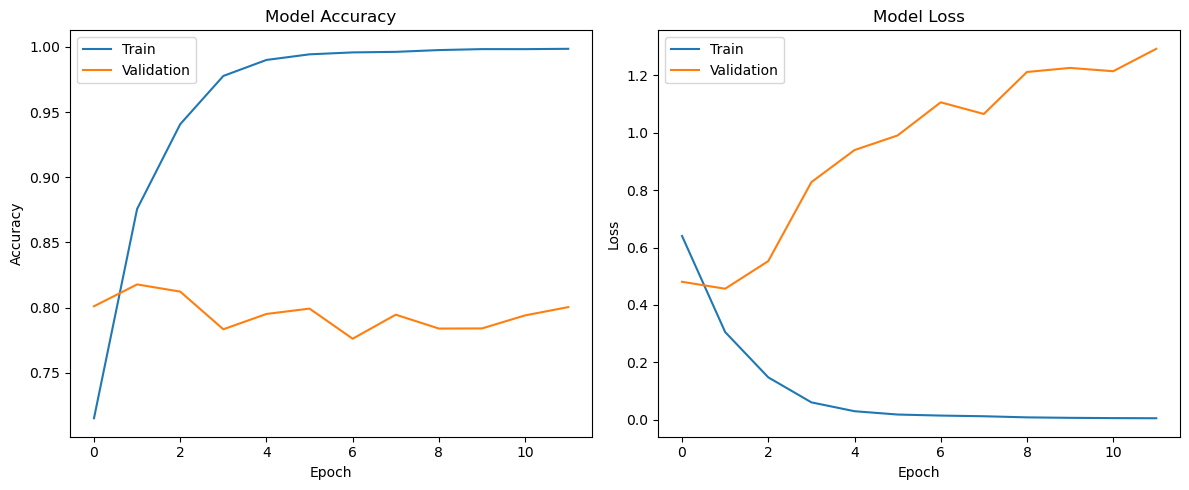

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
# In each epoch: training on 80% of the data, then validating on the remaining 20% (val_data), not used for weight updates
# The best epoch is epoch=2 cuz it has the lowest val_loss 
# Beyond epoch=2 the model seems to be over-fitted

625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step


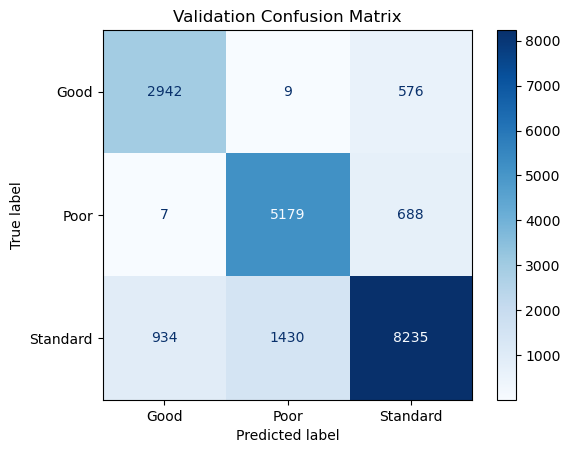

In [26]:
# While the 0.46 val_loss may not be ideal, we shall complete the analysis
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on validation set
val_preds = model.predict(X_val)
val_pred_labels = np.argmax(val_preds, axis=1)
val_true_labels = np.argmax(y_val, axis=1)

# Confusion matrix
cm = confusion_matrix(val_true_labels, val_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Validation Confusion Matrix")
plt.show()


In [ ]:
# We should've cleaned the data more thoroughly, see e.g. 
# https://www.kaggle.com/code/clkmuhammed/credit-score-classification-part-1-data-cleaning#A.-Recognizing-and-Understanding-Data
# What matters are numerical and categorical financial variables, not identities, hence
# the better approach is to drop Name entirely (which we did),
# what matters are numerical and categorical financial variables, not identities
# In the future, we can try to clean this data set again: converting entries, missing values, weird age entries and so on